In [ ]:
!nvidia-smi

Sat Oct 19 12:47:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


## Install Roboflow

## Import Dataset

In [ ]:
!pip install roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

rf = Roboflow(api_key="B79emy1DpjbYbHZvlcan")

project = rf.workspace("cabbage-mei23").project("cabbage-k6qvz")
version = project.version(2)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cabbage-2 in yolov11:: 100%|██████████| 478/478 [00:00<00:00, 5781.49it/s]


## Train

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 5.35M/5.35M [00:00<00:00, 111MB/s]
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/cabbage-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch441.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch442.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1729342580.77bc8ebde267.2900.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch440.jpg


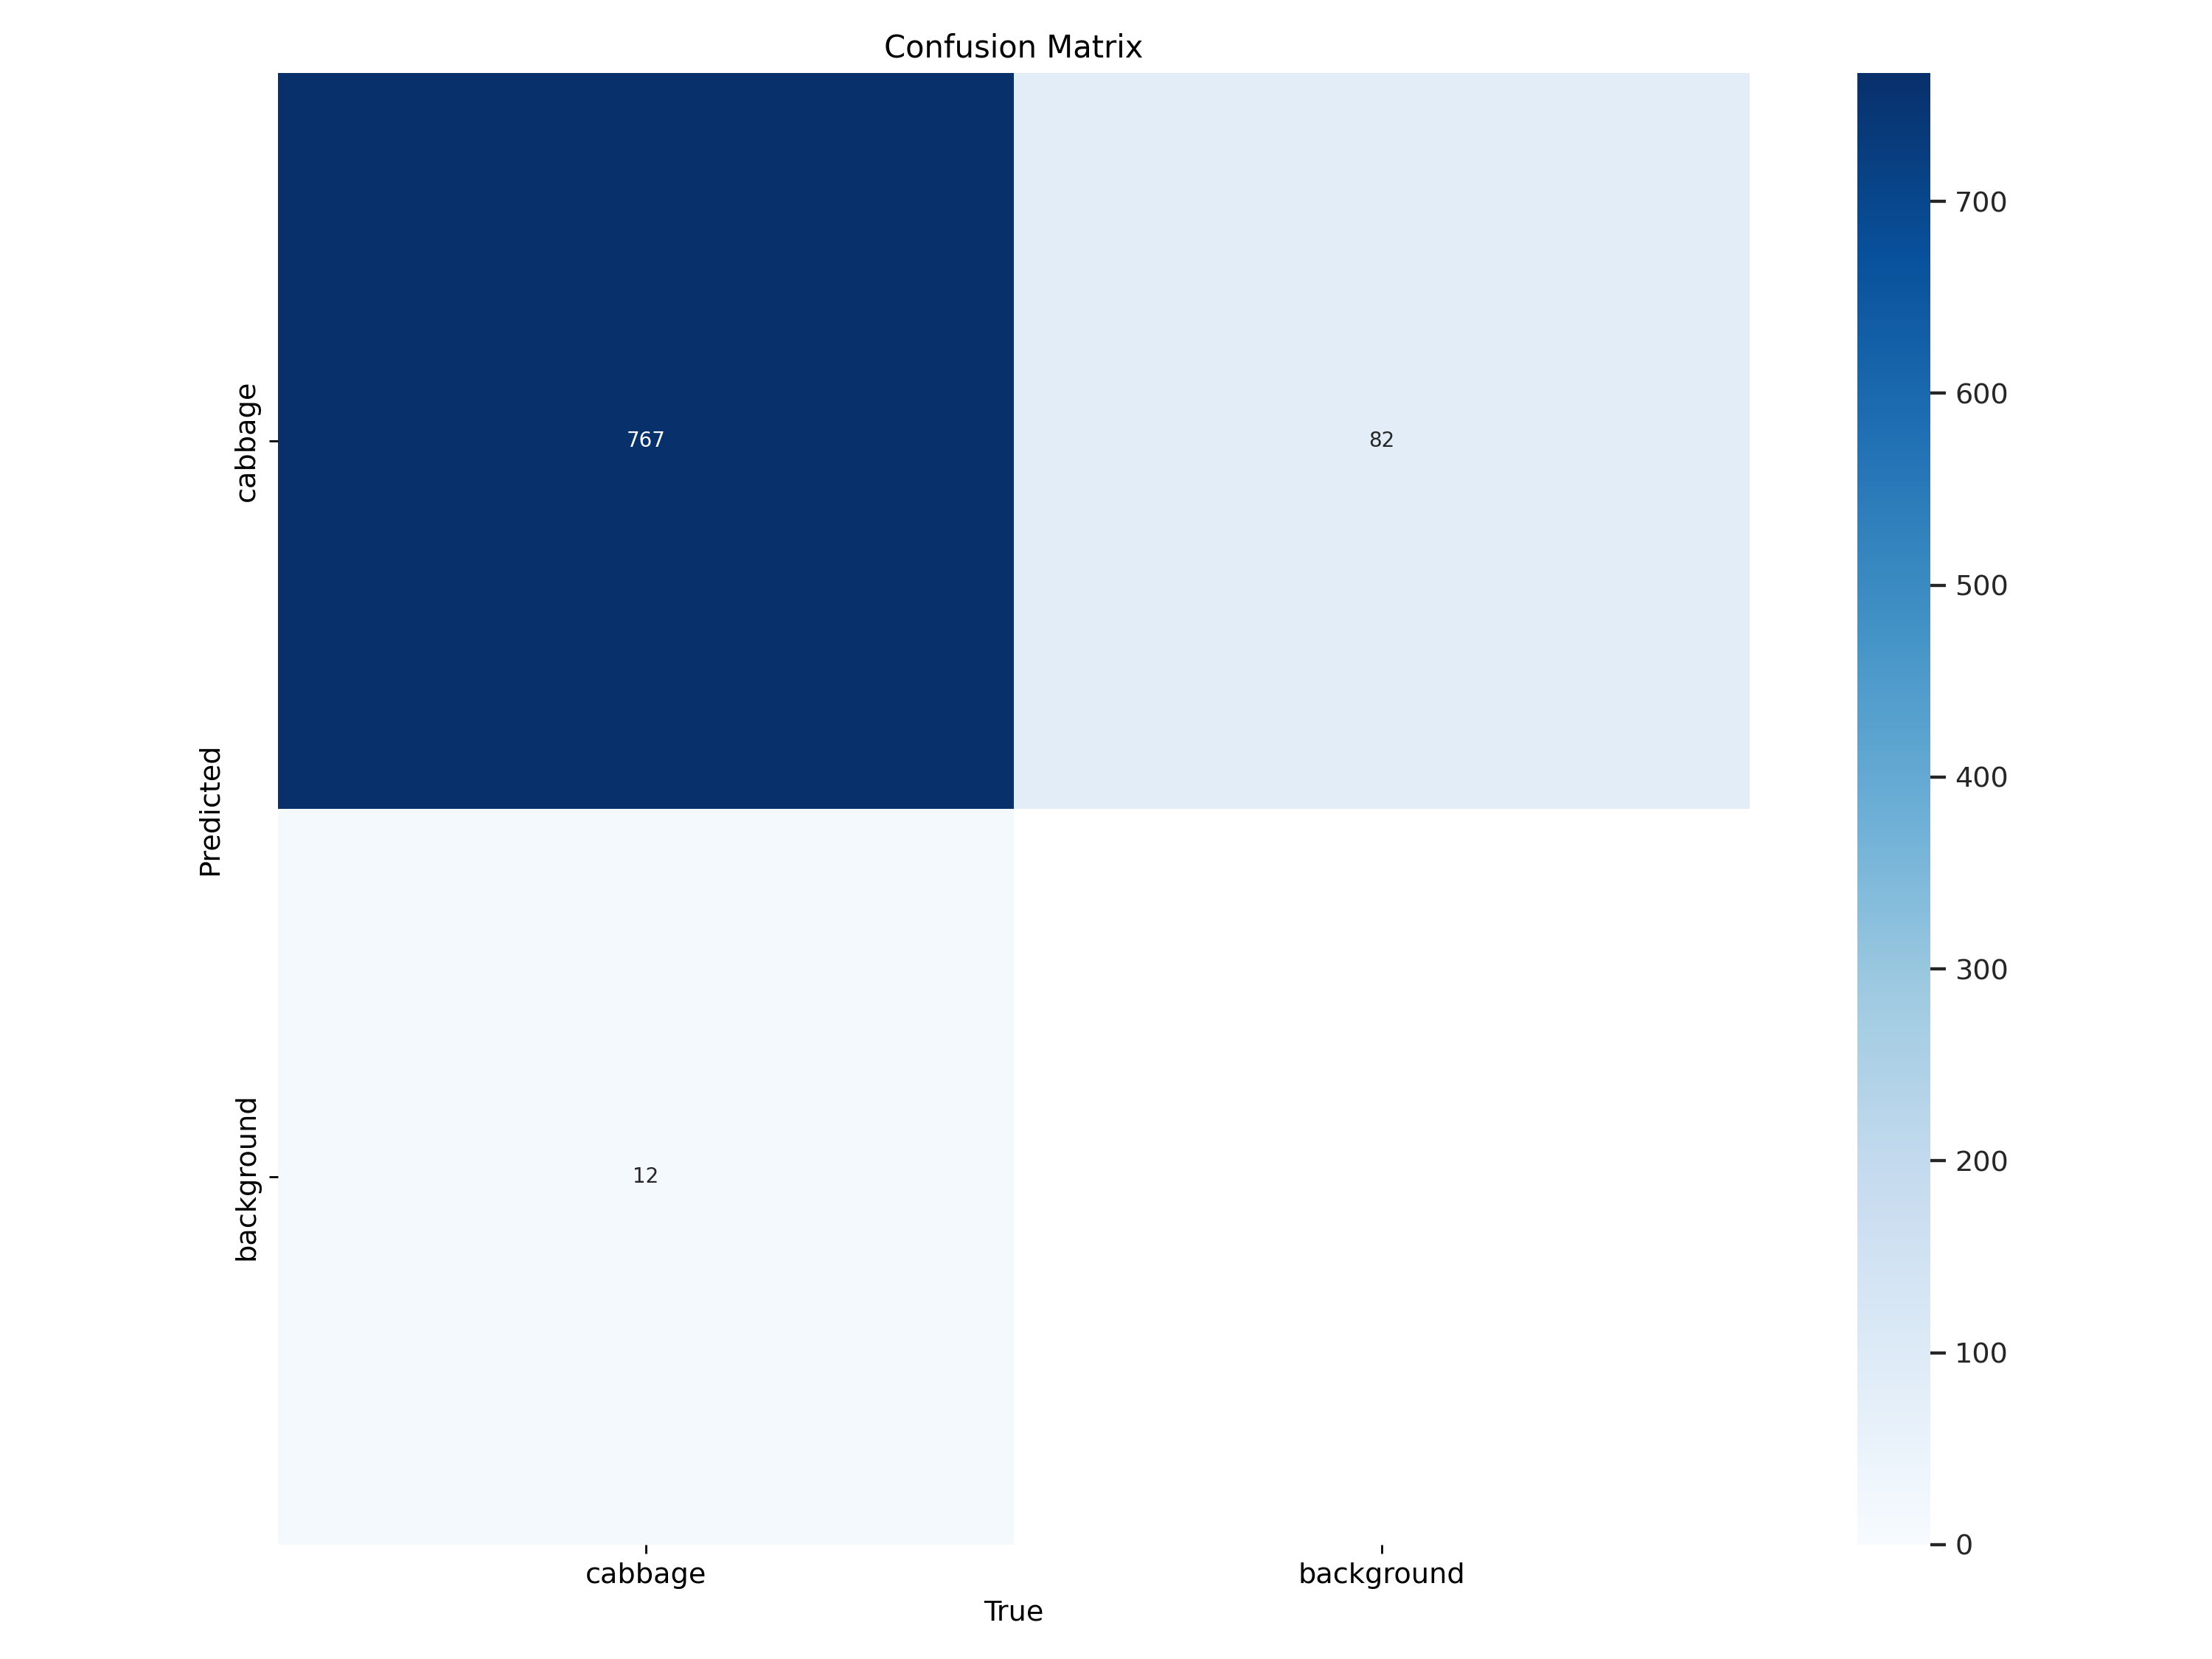

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

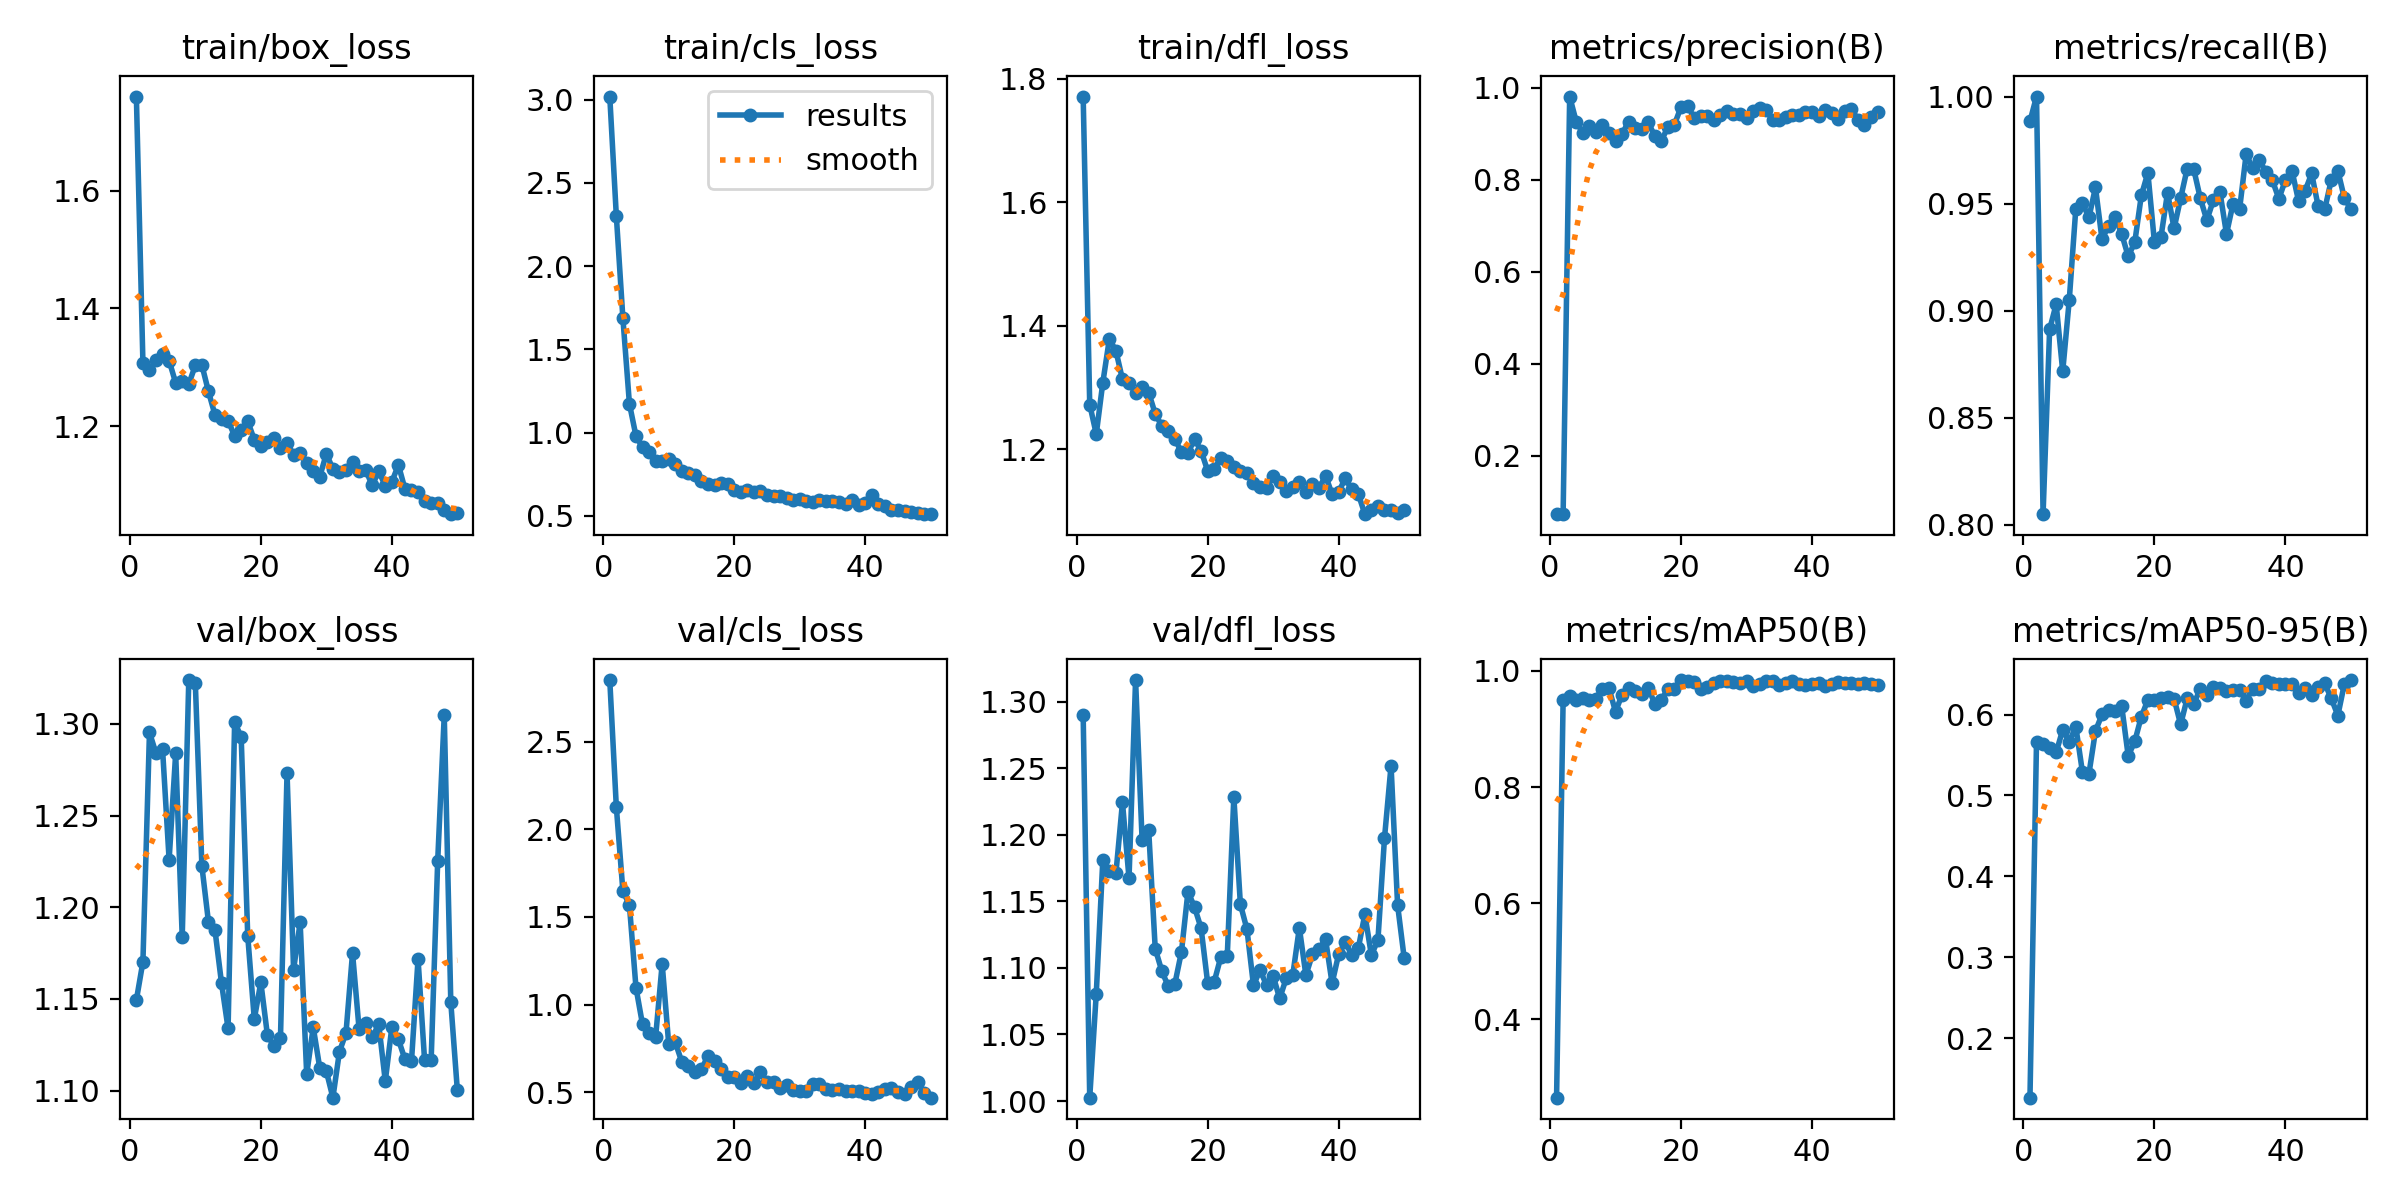

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

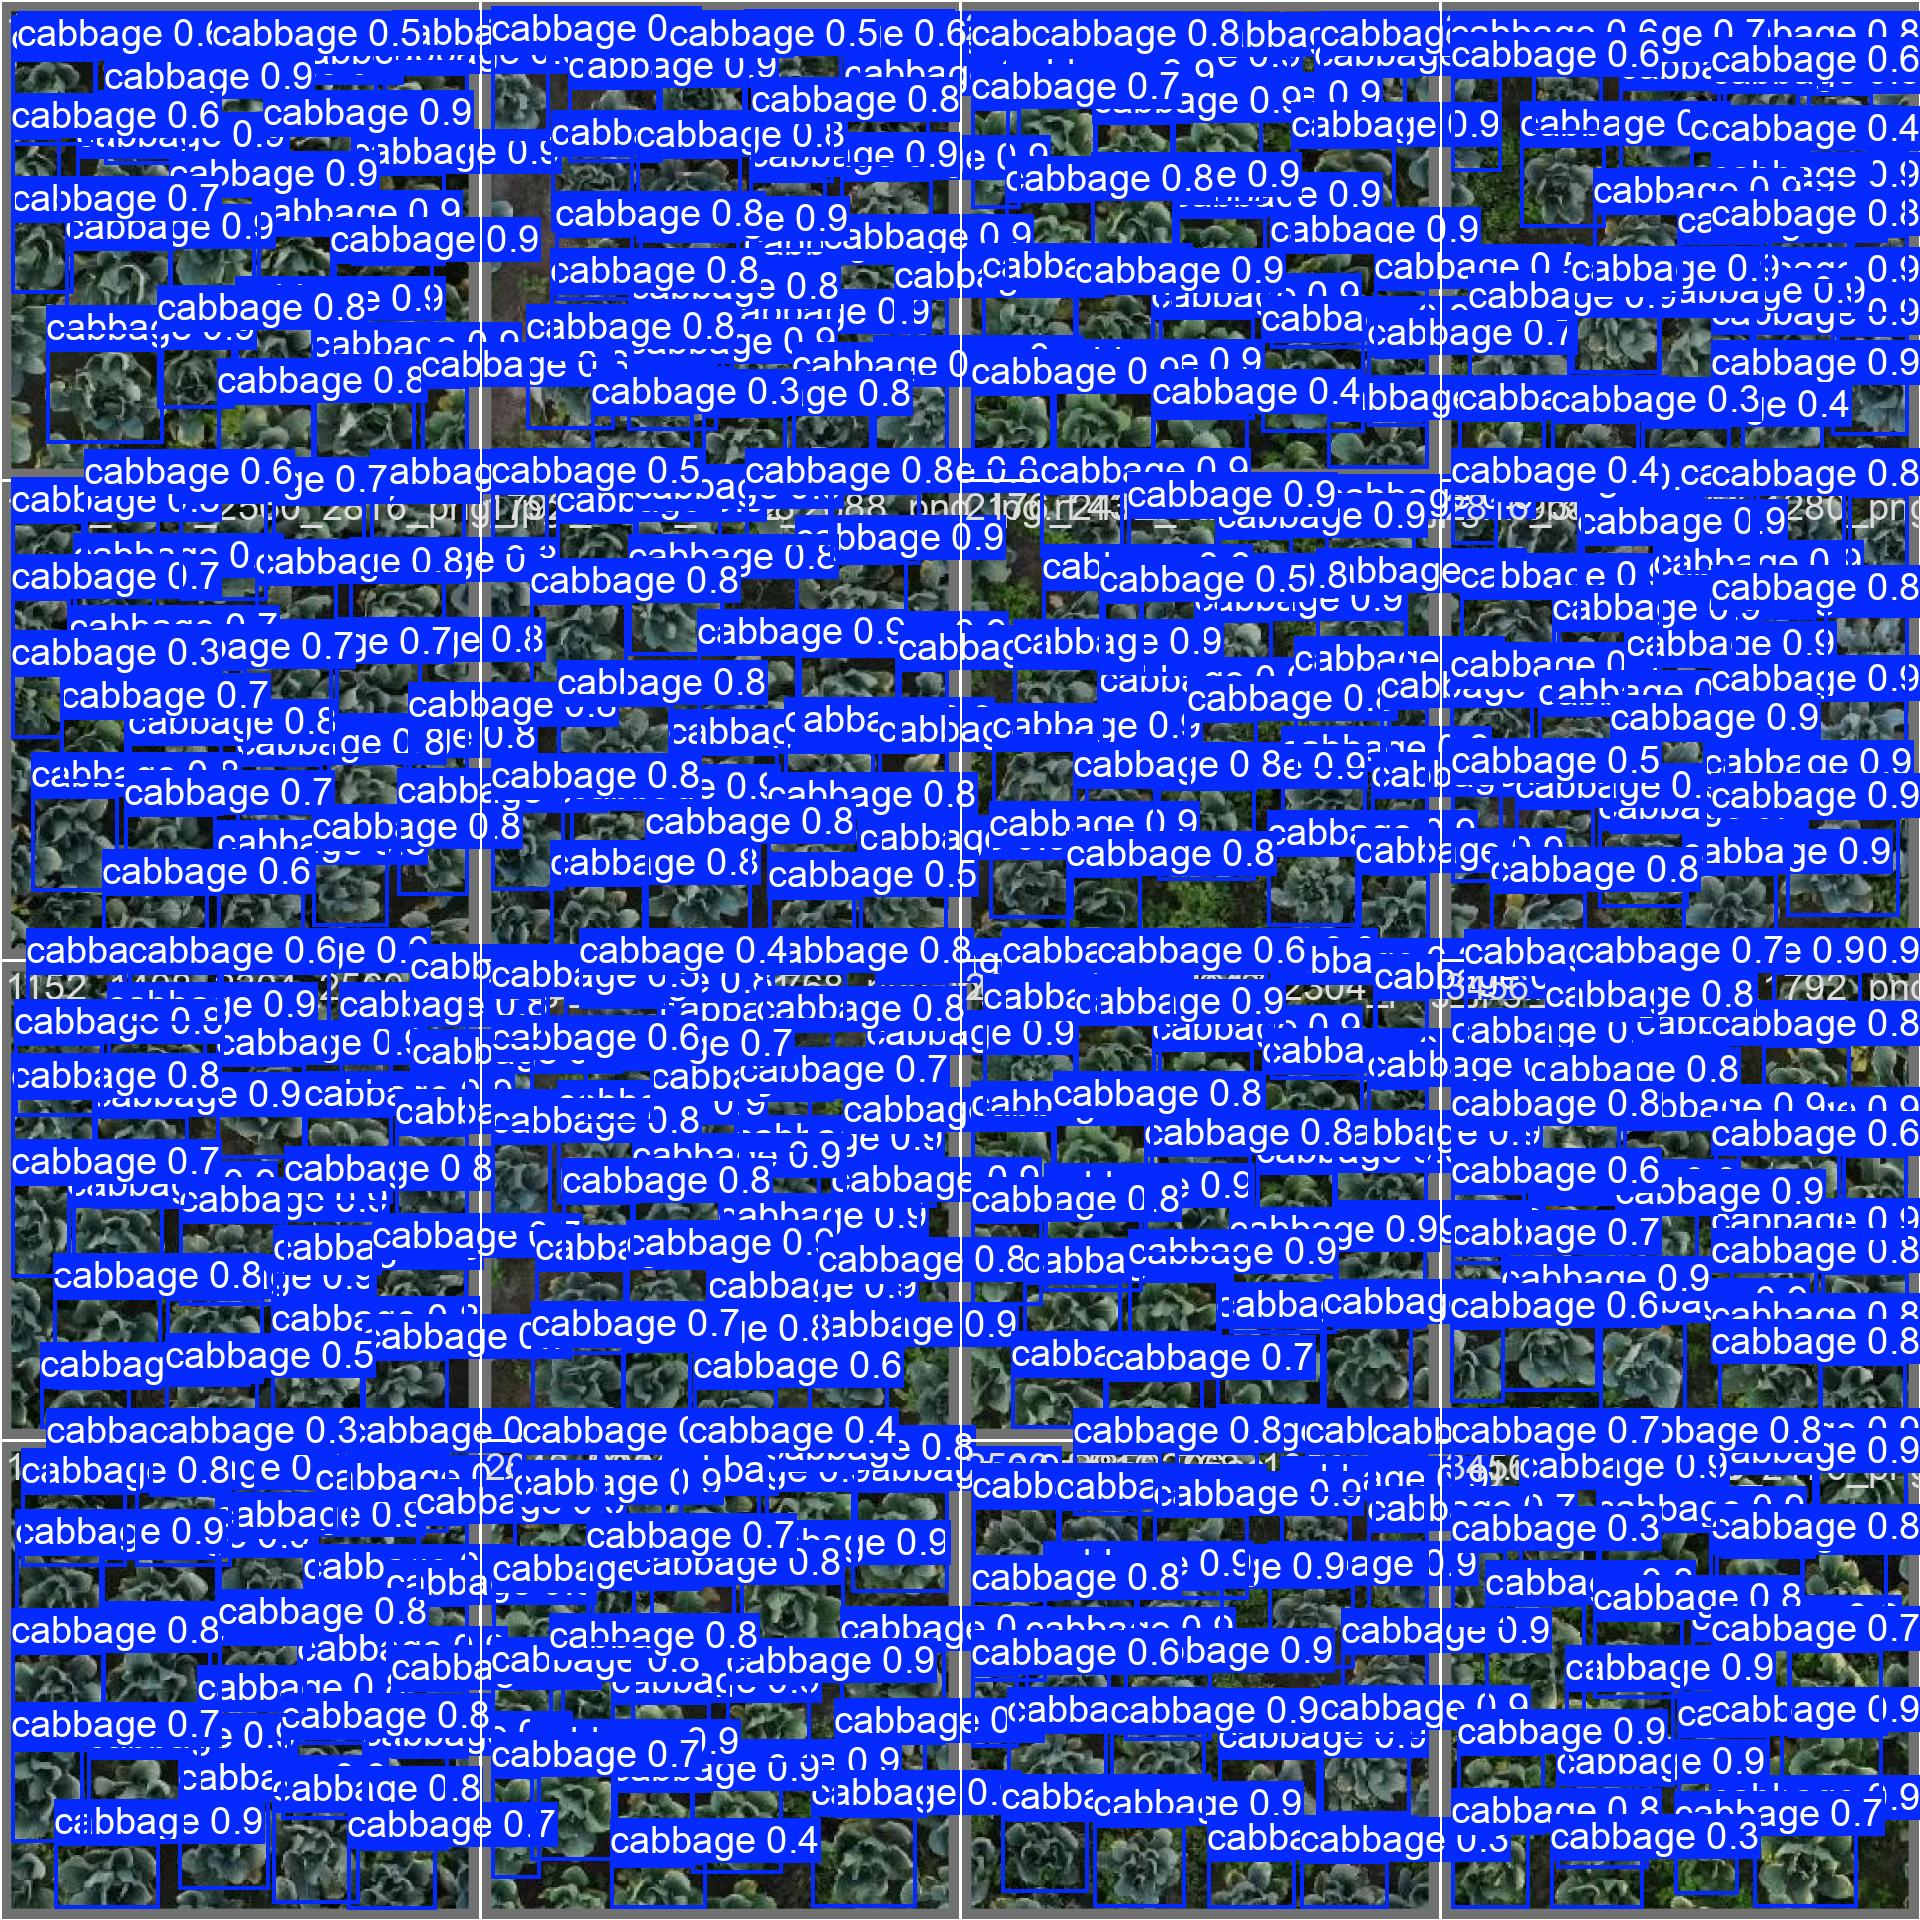

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate after trained model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/cabbage-2/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.18s/it]
                   all         35        779      0.947      0.947      0.976      0.641
Speed: 2.9ms preprocess, 20.9ms inference, 0.0ms loss, 17.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/25 /content/datasets/cabbage-2/test/images/1024_1280_2688_2944_png_jpg.rf.c86f3fc683b2410dceb3f16952ccdb83.jpg: 640x640 20 cabbages, 11.0ms
image 2/25 /content/datasets/cabbage-2/test/images/2048_2304_768_1024_png_jpg.rf.455335acd284cd2f5463959dc6a13d05.jpg: 640x640 32 cabbages, 10.6ms
image 3/25 /content/datasets/cabbage-2/test/images/2176_2432_2176_2432_png_jpg.rf.fdceb678425c9af8cdcfae8b0ac9515c.jpg: 640x640 32 cabbages, 9.6ms
image 4/25 /content/datasets/cabbage-2/test/images/2688_2944_512_768_png_jpg.rf.57ce92c734eda14ad4c8eb1091d2d2ff.jpg: 640x640 34 cabbages, 8.4ms
image 5/25 /content/datasets/cabbage-2/test/images/2816_3072_1920_2176_png_jpg.rf.21c3afa574651d507a1c6ad54196875c.jpg: 640x640 31 cabbages, 8.2ms
image 6/25 /content/datasets/cabbage-2/test/images/3584_3840_1920_2176_png_jpg.rf.60775cd4e5d12e8ad6

# Predicted result

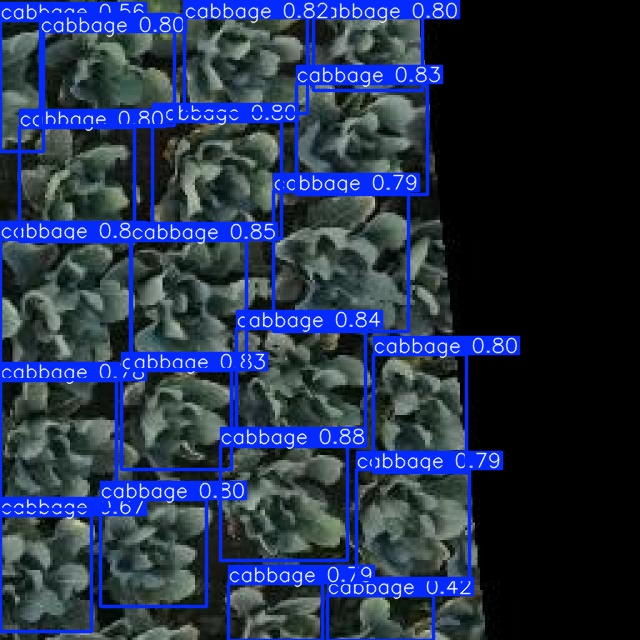

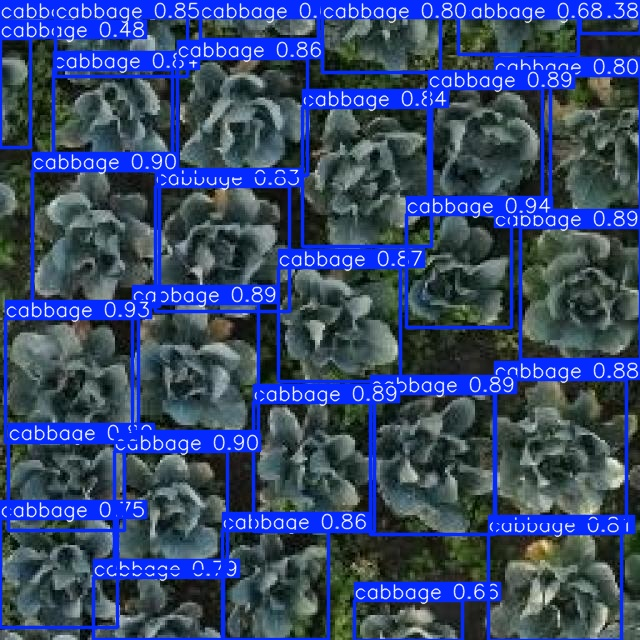

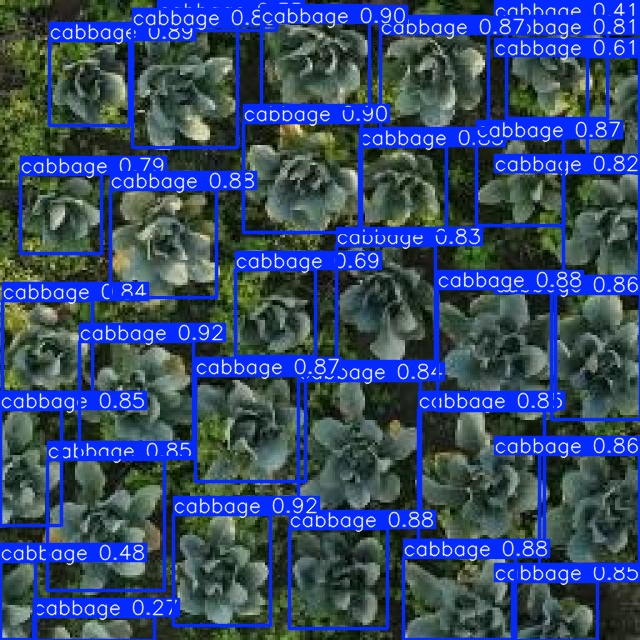

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")